In [126]:
import matplotlib.pyplot as plt
import pandas as pd
import mplcyberpunk
plt.style.use("cyberpunk")
import seaborn as sns
# plt.style.use('ggplot')

import scipy.stats
import statsmodels.api as sm

Text(0.5, 1.0, 'Cluster Summary Report')

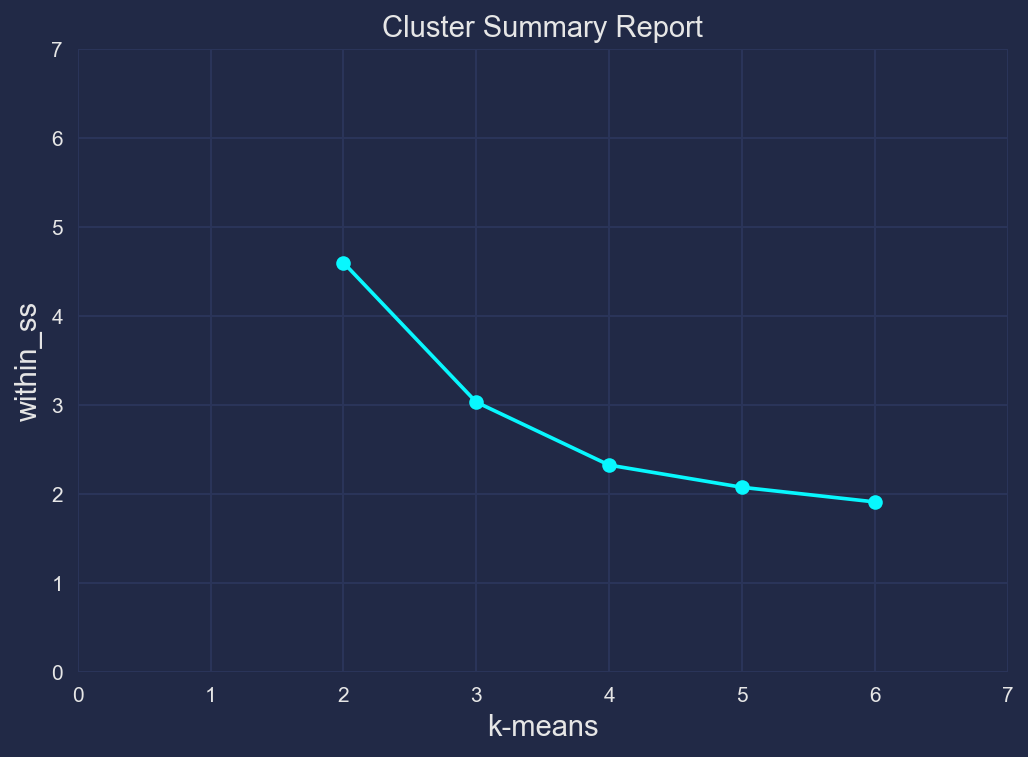

In [127]:
fig, axs = plt.subplots(dpi=150)
axs.plot([2, 3, 4 ,5 ,6], [4.602170, 3.034320, 2.326490, 2.076850, 1.912270], marker='o')
axs.set_ylabel('within_ss', fontsize=14)
axs.set_xlabel('k-means', fontsize=14)
axs.set_ylim(0,7)
axs.set_xlim(0,7)
axs.set_title('Cluster Summary Report', fontsize=14)

# mplcyberpunk.add_glow_effects()
# fig.savefig('cluster_report.png', dpi=150)

In [128]:
gun = pd.read_csv('matrin.csv')
gun

,Date Killed,City,State,Victim Name,Victim Age,Victim Age Group,Victim Gender,Source,Latitude,Longitude,...,Handgun - Owner license required,Handgun - Carry permits issued,Handgun - Open Carry,Handgun - State Preemption of local restrictions,Handgun - NFA weapons restricted,Handgun - Peaceable Journey laws,Date Killed.year,Date Killed.month,Date Killed.day-of-month,Date Killed.day-of-week
0,2012-12-14,Westminster,Colorado,Antida Archuleta,20.0,adult,Female,http://www.9news.com/rss/story.aspx?storyid=30...,39.893668,-105.072112,...,No,Yes,Yes,Yes,No,Yes,2012,12,14,5
1,2012-12-14,Newtown,Connecticut,Charlotte Bacon,6.0,child,Female,http://www.cnn.com/2012/12/15/us/connecticut-s...,41.412323,-73.311424,...,No,Yes,Yes,Partial,Partial,No,2012,12,14,5
2,2012-12-14,Newtown,Connecticut,Olivia Engel,6.0,child,Female,http://www.cnn.com/2012/12/15/us/connecticut-s...,41.412323,-73.311424,...,No,Yes,Yes,Partial,Partial,No,2012,12,14,5
3,2012-12-14,Newtown,Connecticut,Ana Marquez-Greene,6.0,child,Female,http://www.cnn.com/2012/12/15/us/connecticut-s...,41.412323,-73.311424,...,No,Yes,Yes,Partial,Partial,No,2012,12,14,5
4,2012-12-14,Newtown,Connecticut,Dylan Hockley,6.0,child,Male,http://www.cnn.com/2012/12/15/us/connecticut-s...,41.412323,-73.311424,...,No,Yes,Yes,Partial,Partial,No,2012,12,14,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8301,2013-09-18,New Orleans,Louisiana,Watson Terrell,35.0,adult,Male,http://www.nola.com/crime/index.ssf/2013/09/ma...,29.949932,-90.070116,...,NaN,NaN,NaN,NaN,NaN,NaN,2013,9,18,3
8302,2013-09-18,Miami,Florida,Vivian Gallego Martinez,51.0,adult,Female,http://www.nbcmiami.com/news/local/Police-Purs...,25.774266,-80.193659,...,No,Yes,No,Yes,No,No,2013,9,18,3
8303,2013-09-18,Miami,Florida,Anabel Benitez,28.0,adult,Female,http://www.nbcmiami.com/news/local/Police-Purs...,25.774266,-80.193659,...,No,Yes,No,Yes,No,No,2013,9,18,3
8304,2013-09-18,Miami,Florida,Antonio Feliu,NaN,adult,Male,http://www.nbcmiami.com/news/local/Police-Purs...,25.774266,-80.193659,...,No,Yes,No,Yes,No,No,2013,9,18,3


In [129]:
to_scatter = gun['Victim Age'].value_counts().reset_index()
to_scatter.rename(columns={"index": "Age", "Victim Age": "Count"}, inplace=True)

In [130]:
to_scatter

,Age,Count
0,20.0,333
1,21.0,324
2,22.0,323
3,19.0,307
4,23.0,305
...,...,...
89,95.0,2
90,88.0,2
91,90.0,1
92,91.0,1


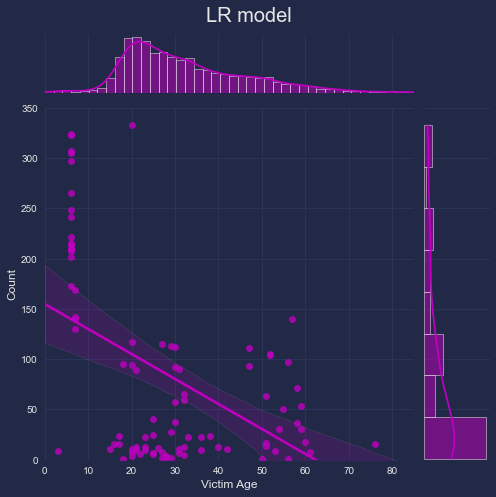

In [131]:
p = sns.jointplot(x="Victim Age", y=to_scatter['Count'],
data=gun, kind="reg", truncate=False,
xlim=(0, 85), ylim=(0, 350),
color="m", height=7)
p.fig.suptitle("LR model", size=20)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.925) # Reduce plot to make room

p.savefig('first.pdf', dpi=200)

<AxesSubplot:xlabel='Age', ylabel='Count'>

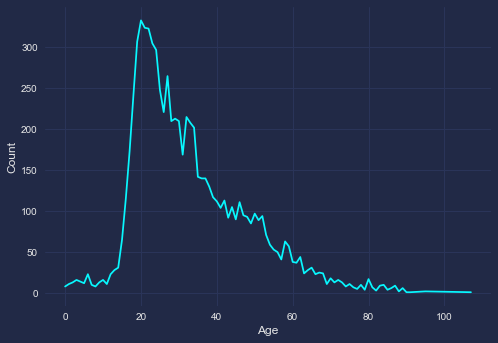

In [132]:
sns.lineplot(data=to_scatter, x='Age', y='Count')

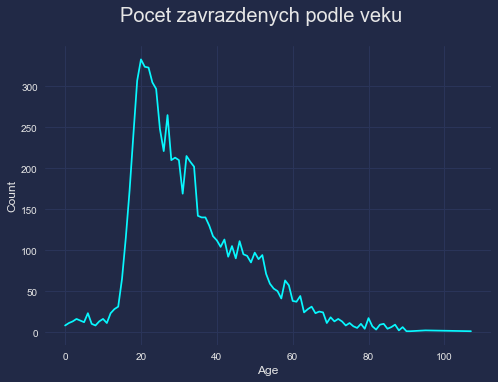

In [137]:
p1 = sns.lineplot(data=to_scatter, x='Age', y='Count')
p1.figure.suptitle("Pocet zavrazdenych podle veku", size=20)
p1.figure.savefig('second.pdf', dpi=200)

In [134]:
to_scatter

,Age,Count
0,20.0,333
1,21.0,324
2,22.0,323
3,19.0,307
4,23.0,305
...,...,...
89,95.0,2
90,88.0,2
91,90.0,1
92,91.0,1


In [135]:
X = sm.add_constant(to_scatter['Age'])
y = to_scatter['Count']

logit = sm.Logit(y, X)  # Зависимая переменная - первая
res = logit.fit()
print(res.summary())

ValueError: endog must be in the unit interval.

In [ ]:
res = scipy.stats.linregress(to_scatter['Count'], to_scatter['Age'])  # Вторая переменная зависимая
print(res)